<a href="https://colab.research.google.com/github/sasumwen/tensorflow-developer-certificate_ZTM/blob/main/01_Neural_Network_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with NN in TF

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.9.2'

### Create data to view and fit

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


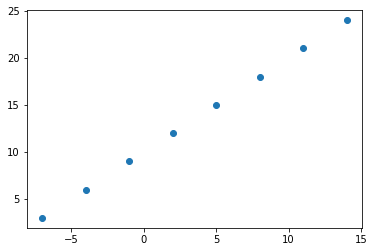

In [5]:
# create features 
X = np.array([-7.0, -4, -1, 2,5,8,11,14])

# createlabels
y = np.array([3.0,6,9,12,15,18,21,24])

# visualize it
plt.scatter(X,y)


## input and output shapes


In [6]:
# create a demo tensor for housing price prediction prob
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
# turn our np into tf
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## steps in modelling in TensorFlow

1. Creating a model - define the input and output layer, as well as the hidden layers of a deep learning model
2. COmpiling a model - define the loss function (in other words, the funciton which tells the model how wrong it is) and th eoptimizer ( tells our model how to improve its learning) and the evaluation metrics (what we can use to interprest the performance of our model)
3. Fitting a model - letting the model try to find patterns between X and y (features and labels)

In [8]:
#  set random see
tf.random.set_seed(84)

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2, compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is stochastic gradient descent
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.3754 - mae: 11.3754
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2429 - mae: 11.2429
Epoch 3/5
1/1 [==============================] - 0s 23ms/step - loss: 11.1104 - mae: 11.1104
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 10.9779 - mae: 10.9779
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 10.8454 - mae: 10.8454


In [9]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
# try to make pres using the model
model.predict([17])

1/1 [==============================] - 0s 170ms/step


array([[13.344376]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a Mocel** - here we might add more hiden layers, increate the number of hiden units( all called neurons) within each of the hiden layers, chage the activation function of each layer

2. **Compiling a model** - here we might change the optimixzation function or perhaps the learning rate of the opt function

3. **fitting a model** - here fit a model fo more epochs( leave it trian long) or give it more features tol learn from

In [11]:
# lets rebuild the model
# 1 create the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2 compile
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3 fit

model.fit(tf.expand_dims(X, axis=-1,), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 354ms/step - loss: 16.8805 - mae: 16.8805
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 16.5993 - mae: 16.5993
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 16.3180 - mae: 16.3180
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 16.0368 - mae: 16.0368
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 15.7555 - mae: 15.7555
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 15.4743 - mae: 15.4743
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 15.1930 - mae: 15.1930
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 14.9149 - mae: 14.9149
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 14.7824 - mae: 14.7824
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 14.6499 - mae: 14.6499
Epoch 11/100
1/1 [==============================] - 

In [12]:
# recall the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# see if the prediction has imporved
model.predict([17])

1/1 [==============================] - 0s 227ms/step


array([[29.472445]], dtype=float32)

In [14]:
# let try again

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
   
    
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 464ms/step - loss: 14.3905 - mae: 14.3905
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.7663 - mae: 13.7663
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 13.1458 - mae: 13.1458
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5231 - mae: 12.5231
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8935 - mae: 11.8935
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2493 - mae: 11.2493
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5914 - mae: 10.5914
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.9217 - mae: 9.9217
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2212 - mae: 9.2212
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4940 - mae: 8.4940
Epoch 11/100
1/1 [==============================] - 0s 7ms/

In [15]:
model.predict([17])

1/1 [==============================] - 0s 237ms/step


array([[31.810333]], dtype=float32)

## Evaluating a model

3 words to momeorized when evluuating, visualize visualize visualize
* the data - what does te data look like'
* the model -
* the training - how does it perform while it let
* the predictions of te model- how it lines up agains the grand truth

In [16]:
# MAke a bigger dataset

X= tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
y = X + 10

In [18]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [24]:
X = tf.cast(X, tf.float32)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [25]:
y = tf.cast(y, tf.float32)
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

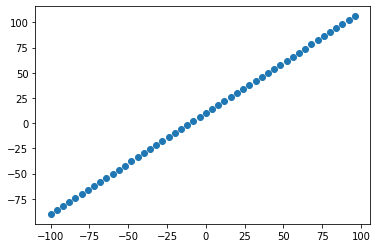

In [28]:
# visualize
plt.scatter(X, y)

### the 3 sets

* train
* validation
* test

In [30]:
# check the len of samples
len(X)

50

In [31]:
tf.random.set_seed(84)

# split the data into train and test
X_train = X[:40] # first 40 of the training sample (80%)
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the train and test data

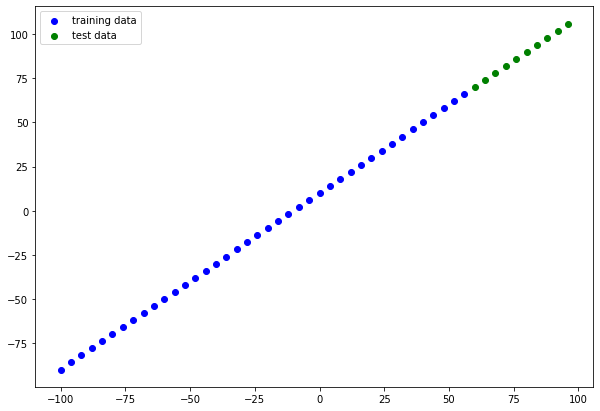

In [33]:
plt.figure(figsize=(10,7))
# plot trainin gdata int blue
plt.scatter(X_train, y_train, c ="b", label="training data")
# the test in gree
plt.scatter(X_test, y_test, c='g', label = "test data" )

# show a legend
plt.legend();